In [ ]:
import sys
sys.path.insert(0, '/mnt/nas/users/mjm/LDPUts')

from discretizer import discretizer
from client import client
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
from server import server_ell2, server_multinomial_genrr, server_multinomial_bitflip
from data_generator import data_generator
from discretizer import discretizer
import time
import numpy as np
from scipy.stats import chi2
from utils import chi_sq_dist

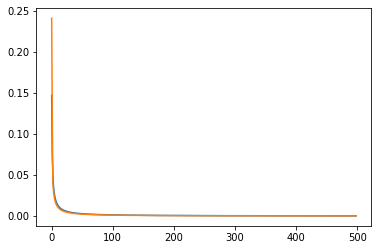

In [30]:
n_test = 10
n_permutation = 99
significance_level = 0.05
alphabet_size = 500

###################
sample_size = 50000
###################

data_gen = data_generator(device)

p1 = torch.arange(1,alphabet_size).reciprocal()
p1 = p1.divide(p1.sum())

p2 = p1.clone()
p2[0] = p2[0]*2
p2[1] = p2[1]*2
p2 = p2.divide(p2.sum())
plt.plot(p1)
plt.plot(p2)


p_value_array_priv_01 = np.zeros([n_test, 3])
p_value_array_priv_05 = np.zeros([n_test, 3])
p_value_array_priv_10 = np.zeros([n_test, 3])
p_value_array_priv_20 = np.zeros([n_test, 3])


## privacy level = 0.1

In [ ]:
privacy_level = 0.1

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p1, sample_size)
    data_z = data_gen.generate_multinomial_data(p2, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_01[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_01[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_01[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/power/power_law/k_500_n_500_alpha_01_type_1_powerlaw', 'wb') as f:
    np.save(f, p_value_array_priv_01)

## privacy level = 0.5

In [ ]:
privacy_level = 0.5

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p1, sample_size)
    data_z = data_gen.generate_multinomial_data(p2, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_05[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_05[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_05[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/power_law/k_500_n_500_alpha_05_type_1_powerlaw', 'wb') as f:
    np.save(f, p_value_array_priv_05)

## privacy level = 1.0

In [35]:
privacy_level = 2.0

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_ell2(device, privacy_level)
server_bitflip = server_ell2(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p1, sample_size)
    data_z = data_gen.generate_multinomial_data(p2, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_10[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_10[i,1] = server_genrr.release_p_value_permutation(n_permutation)
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_10[i,2] = server_bitflip.release_p_value_permutation(n_permutation)
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/power/power_law/k_500_n_500_alpha_10_type_1_powerlaw', 'wb') as f:
    np.save(f, p_value_array_priv_10)

1th test
2th test
3th test
4th test
5th test
6th test
7th test
8th test
9th test
10th test
90.18623495101929
privacy level = 2.0


In [36]:
print((p_value_array_priv_10[:,0]<significance_level).mean())
print((p_value_array_priv_10[:,1]<significance_level).mean())
print((p_value_array_priv_10[:,2]<significance_level).mean())

1.0
0.1
1.0


## privacy level = 2.0

In [ ]:
privacy_level = 2.0

LDPclient = client(device, privacy_level)
server_elltwo = server_ell2(device, privacy_level)
server_genrr = server_multinomial_genrr(device, privacy_level)
server_bitflip = server_multinomial_bitflip(device, privacy_level)

t = time.time()
for i in range(n_test):
    print(f"{i+1}th test")
    torch.manual_seed(i)
    data_y = data_gen.generate_multinomial_data(p1, sample_size)
    data_z = data_gen.generate_multinomial_data(p2, sample_size)
    
    LDPclient.load_data_multinomial(data_y, data_z, alphabet_size)
    data_list_lapu_y, data_list_lapu_z = LDPclient.release_lapu()
    data_list_genrr_y, data_list_genrr_z = LDPclient.release_genrr()
    data_list_bitflip_y, data_list_bitflip_z = LDPclient.release_bitflip()
    
    server_elltwo.load_private_data_multinomial(data_list_lapu_y, data_list_lapu_z, alphabet_size)
    p_value_array_priv_20[i,0] = server_elltwo.release_p_value_permutation(n_permutation)
 
    server_genrr.load_private_data_multinomial(data_list_genrr_y, data_list_genrr_z, alphabet_size)
    p_value_array_priv_20[i,1] = server_genrr.release_p_value()
     
    server_bitflip.load_private_data_multinomial(data_list_bitflip_y, data_list_bitflip_z, alphabet_size)
    p_value_array_priv_20[i,2] = server_bitflip.release_p_value()
elapsed = time.time() - t
print(elapsed)
print(
   # f"small chi-square distance\n"+
        f"privacy level = {privacy_level}"
)


with open('/mnt/nas/users/mjm/LDPUts/simul/type_1/hi_dim/power_law/k_500_n_500_alpha_20_type_1_powerlaw', 'wb') as f:
    np.save(f, p_value_array_priv_20)